<a href="https://colab.research.google.com/github/markmaci/ml-ai-project/blob/cnn_branch/ML_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Convolutional Neural Networks

## 1.1. Initial CNN Model

In [45]:
#Dataframe
import pandas as pd

#Matplotlib.pyplot
import matplotlib.pyplot as plt

#Datasets
from datasets import load_dataset

#Scki-kit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

#Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


#Tensor flow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.initializers import Constant

In [30]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/default/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/default/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/default/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
# Load dataset
dataset = load_dataset("sentiment140", trust_remote_code=True)
df = pd.DataFrame(dataset['train'])
print(df.head())

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                           date             user  sentiment     query  
0  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_          0  NO_QUERY  
1  Mon Apr 06 22:19:49 PDT 2009    scotthamilton          0  NO_QUERY  
2  Mon Apr 06 22:19:53 PDT 2009         mattycus          0  NO_QUERY  
3  Mon Apr 06 22:19:57 PDT 2009          ElleCTF          0  NO_QUERY  
4  Mon Apr 06 22:19:57 PDT 2009           Karoli          0  NO_QUERY  


In [32]:
# Rename 'sentiment' to 'target'
df = df.rename(columns={"sentiment": "target"})

# Drop rows with NaN values in 'target' and 'text'
df.dropna(subset=['target', 'text'], inplace=True)

In [33]:
# convert to binary classification
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)

In [34]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase and remove tags
    text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df["text"] = df["text"].apply(preprocess_text)

In [35]:

max_words = 10000
max_len = 100

#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)



In [36]:
embedding_dim = 100

model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=5),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/anaconda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks = [early_stopping])

Epoch 1/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 399s 12ms/step - accuracy: 0.7159 - loss: 0.5483 - val_accuracy: 0.7399 - val_loss: 0.5148
Epoch 2/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 401s 13ms/step - accuracy: 0.7498 - loss: 0.5048 - val_accuracy: 0.7401 - val_loss: 0.5205
Epoch 3/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 402s 13ms/step - accuracy: 0.7625 - loss: 0.4850 - val_accuracy: 0.7393 - val_loss: 0.5232
Epoch 4/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 408s 13ms/step - accuracy: 0.7774 - loss: 0.4612 - val_accuracy: 0.7328 - val_loss: 0.5334


In [38]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy}')

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.7404 - loss: 0.5141
Test Accuracy: 0.7404093742370605


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step


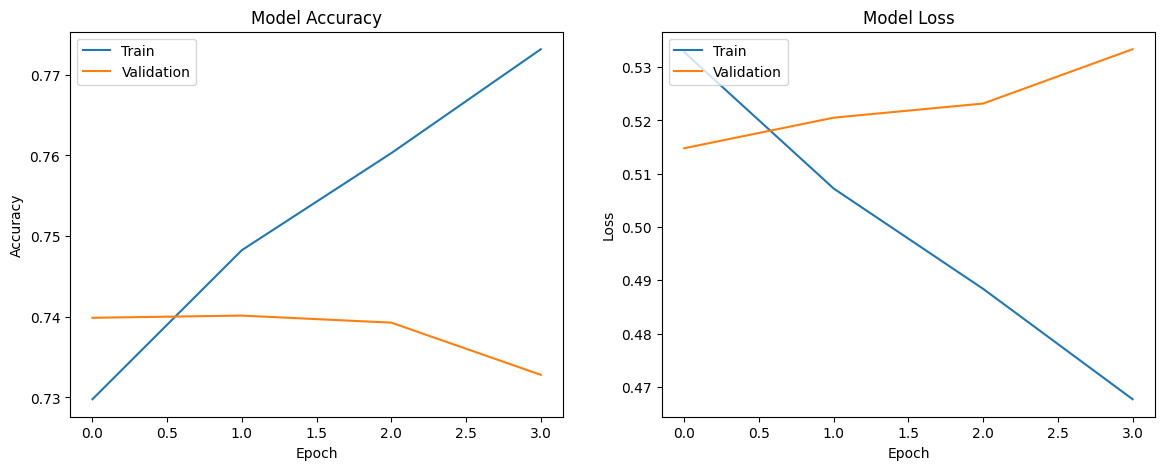

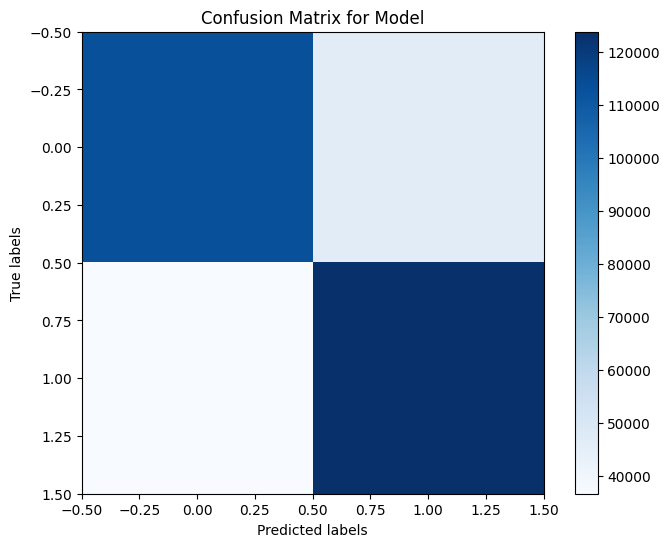

Accuracy: 0.740409375
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73    159494
           1       0.73      0.77      0.75    160506

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000



In [52]:


# Reshape the test data to add a channel dimension
X_test_reshaped = np.expand_dims(X_test_pad, axis=-1)

# Make predictions
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
    
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
    
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Model')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Print results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

**FROM HERE**

## 1.2. Enhanced CNN Model

### 1.2.1 GloVe embeddings

In [62]:
import urllib.request
import zipfile
import os

# Download the GloVe embeddings
url = "http://nlp.stanford.edu/data/glove.6B.zip"
file_name = "glove.6B.zip"

# Download the file
urllib.request.urlretrieve(url, file_name)

# Extract the zip file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(".")

# Optionally, remove the zip file to clean up
os.remove(file_name)

print("Download and extraction complete.")

Download and extraction complete.


 Load GloVe Embeddings into a Matrix:

Pre-trained GloVe embeddings capture semantic relationships between words based on vast amounts of text data, providing a richer starting point for the model compared to random initialization.

In [63]:
embedding_dim = 100
embedding_index = {}

# Make sure the 'glove.6B.100d.txt' file is in your working directory
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [64]:
max_len1 = 150  # Increased sequence length!!

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len1)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len1)


In the enhanced model, several significant improvements have been made:

- Pre-trained GloVe embeddings have been integrated for richer word representations.
- An additional Conv1D layer has been added for capturing more complex features.
MaxPooling1D layers follow each convolutional layer to downsample the feature maps and reduce dimensionality, which helps in capturing the most prominent features
- Dropout rates have been adjusted and additional dropout layers have been added for better regularization. Dropout rates are set to 0.2 after the first two Conv1D layers and 0.5 before the output layer. This regularization technique helps in reducing overfitting.
- Added a Dense layer with 128 units, activated by ReLU, followed by a dropout layer with a dropout rate of 0.5. This fully connected layer helps in combining features extracted by convolutional layers before making the final prediction.
The output layer is a Dense layer with a single unit activated by sigmoid, suitable for binary classification.
- Early stopping and learning rate reduction callbacks have been implemented to optimize training and improve generalization.




In [65]:
# Model
model1 = Sequential([
    Embedding(max_words, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=max_len, trainable=False),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=5),
    Dropout(0.2),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=5),
    Dropout(0.2),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()


/anaconda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Initially, training the enhanced model using 1 epoch with callbacks:

(around 45 min to run)

In [66]:
# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Continue training for more epochs
history = model1.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 433s 13ms/step - accuracy: 0.6873 - loss: 0.5850 - val_accuracy: 0.7161 - val_loss: 0.5481 - learning_rate: 0.0010
Epoch 2/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 429s 13ms/step - accuracy: 0.7142 - loss: 0.5543 - val_accuracy: 0.7199 - val_loss: 0.5437 - learning_rate: 0.0010
Epoch 3/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 432s 14ms/step - accuracy: 0.7193 - loss: 0.5473 - val_accuracy: 0.7231 - val_loss: 0.5430 - learning_rate: 0.0010
Epoch 4/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 426s 13ms/step - accuracy: 0.7237 - loss: 0.5427 - val_accuracy: 0.7229 - val_loss: 0.5393 - learning_rate: 0.0010
Epoch 5/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 427s 13ms/step - accuracy: 0.7268 - loss: 0.5384 - val_accuracy: 0.7247 - val_loss: 0.5391 - learning_rate: 0.0010
Epoch 6/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 427s 13ms/step - accuracy: 0.7292 - loss: 0.5362 - val_accuracy: 0.7260 - val_loss: 0.5339 - learning_rate: 0.0010
Epoch 7/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 42

In [67]:
# Evaluate the model after extended training
final_loss, final_accuracy = model1.evaluate(X_test_pad, y_test)
print(f'Final Test Accuracy: {final_accuracy}')

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.7293 - loss: 0.5303
Final Test Accuracy: 0.7289062738418579


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step


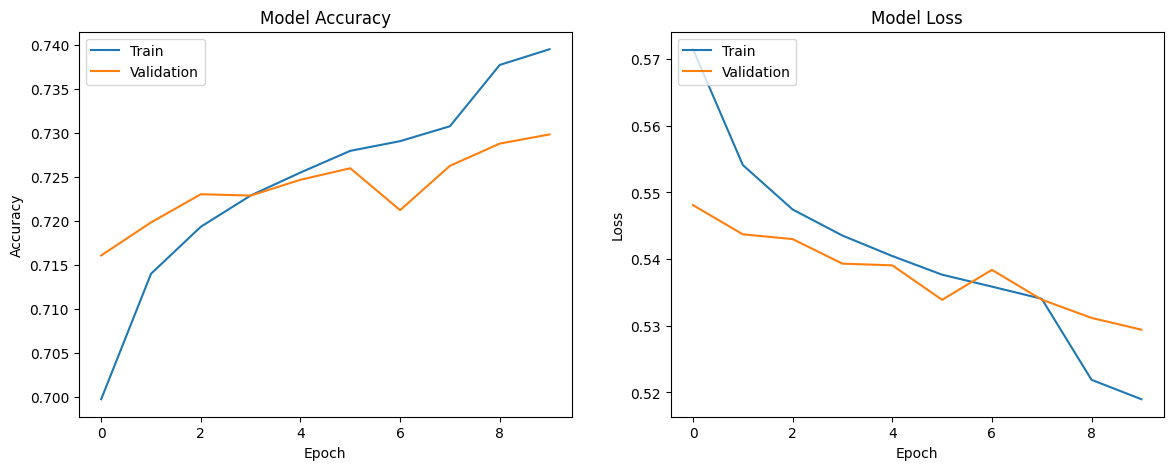

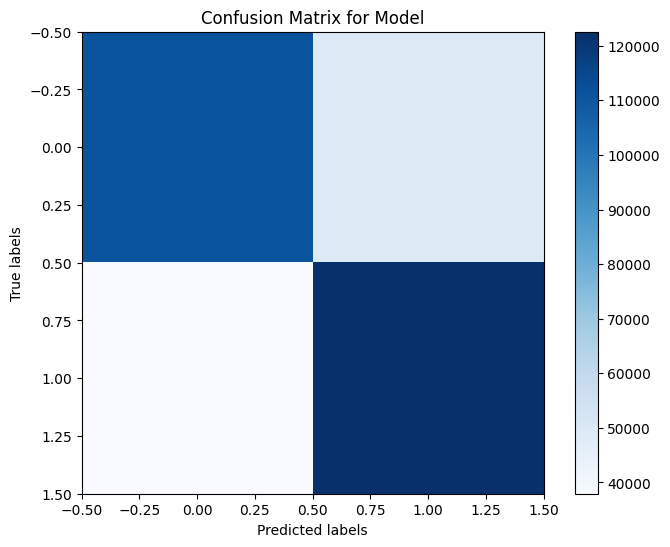

Accuracy: 0.72890625
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.72    159494
           1       0.72      0.76      0.74    160506

    accuracy                           0.73    320000
   macro avg       0.73      0.73      0.73    320000
weighted avg       0.73      0.73      0.73    320000



In [68]:
# Reshape the test data to add a channel dimension
X_test_reshaped1 = np.expand_dims(X_test_pad, axis=-1)

# Make predictions
y_pred1 = (model1.predict(X_test_reshaped1) > 0.5).astype("int32")

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred1)
report1 = classification_report(y_test, y_pred1, output_dict=True)
cm1 = confusion_matrix(y_test, y_pred1)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
    
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
    
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Model')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Print results
print(f"Accuracy: {accuracy1}")
print("Classification Report:")
print(classification_report(y_test, y_pred1))


In practice, it's often observed that:

- Initial Epochs: A simpler model might perform better in the initial few epochs because it is easier to train and converges quickly on simpler patterns.
- Subsequent Epochs: As training progresses, the enhanced model typically surpasses the simpler model due to its greater capacity to learn complex patterns and its better regularization.


The enhanced model should achieve better accuracy with 10 epochs compared to initial model using the same number of epochs.